In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

data = pd.read_csv("G:\Assignments\EDA\Data Sets\Algerian_forest_fires_dataset_UPDATE.csv",header = 1)

In [4]:
k = 2
size = 125
for i in range(k):
    df = data[size*i:size*(i+1)]
    df.to_csv(f'LogReg_{i+1}.csv', index=False)

br_data = pd.read_csv("LogReg_1.csv")
bar_data = pd.read_csv("LogReg_2.csv")
br_data = br_data.drop([122,123,124])
br_data.to_csv("LogReg_1.csv")
bar_data.to_csv("LogReg_2.csv")
bar_data = pd.read_csv("LogReg_2.csv")
br_data = pd.read_csv("LogReg_1.csv")
bar_data = bar_data.drop("Unnamed: 0",axis=1)
br_data = br_data.drop("Unnamed: 0",axis=1)

In [6]:
x_br = br_data.drop(['Classes  '],axis=1)
y_br = br_data['Classes  ']
x_bar = bar_data.drop(['Classes  '],axis=1)
y_bar = bar_data['Classes  ']

In [7]:
from sklearn.model_selection import train_test_split
x_br_train, x_br_test, y_br_train, y_br_test = train_test_split(x_br,y_br,test_size=0.33,random_state=42)
x_bar_train, x_bar_test, y_bar_train, y_bar_test = train_test_split(x_bar,y_bar,test_size=0.33,random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
br_scaler=StandardScaler()
bar_scaler=StandardScaler()

In [13]:
x_br_train = br_scaler.fit_transform(x_br_train)
x_bar_train = bar_scaler.fit_transform(x_bar_train)

In [14]:
x_br_test = br_scaler.transform(x_br_test)
x_bar_test = bar_scaler.transform(x_bar_test)

In [16]:
from sklearn.linear_model import LogisticRegression
br_regression = LogisticRegression()
bar_regression = LogisticRegression()

In [17]:
br_regression.fit(x_br_train,y_br_train)

LogisticRegression()

In [19]:
bar_regression.fit(x_bar_train,y_bar_train)

LogisticRegression()

In [21]:
br_reg_pred = br_regression.predict(x_br_test)
bar_reg_pred = bar_regression.predict(x_bar_test)

In [96]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
br_accuracy = accuracy_score(y_br_test,br_reg_pred)
print(br_accuracy)

bar_accuracy = accuracy_score(y_bar_test,bar_reg_pred)
print(bar_accuracy)

0.8780487804878049
0.975609756097561


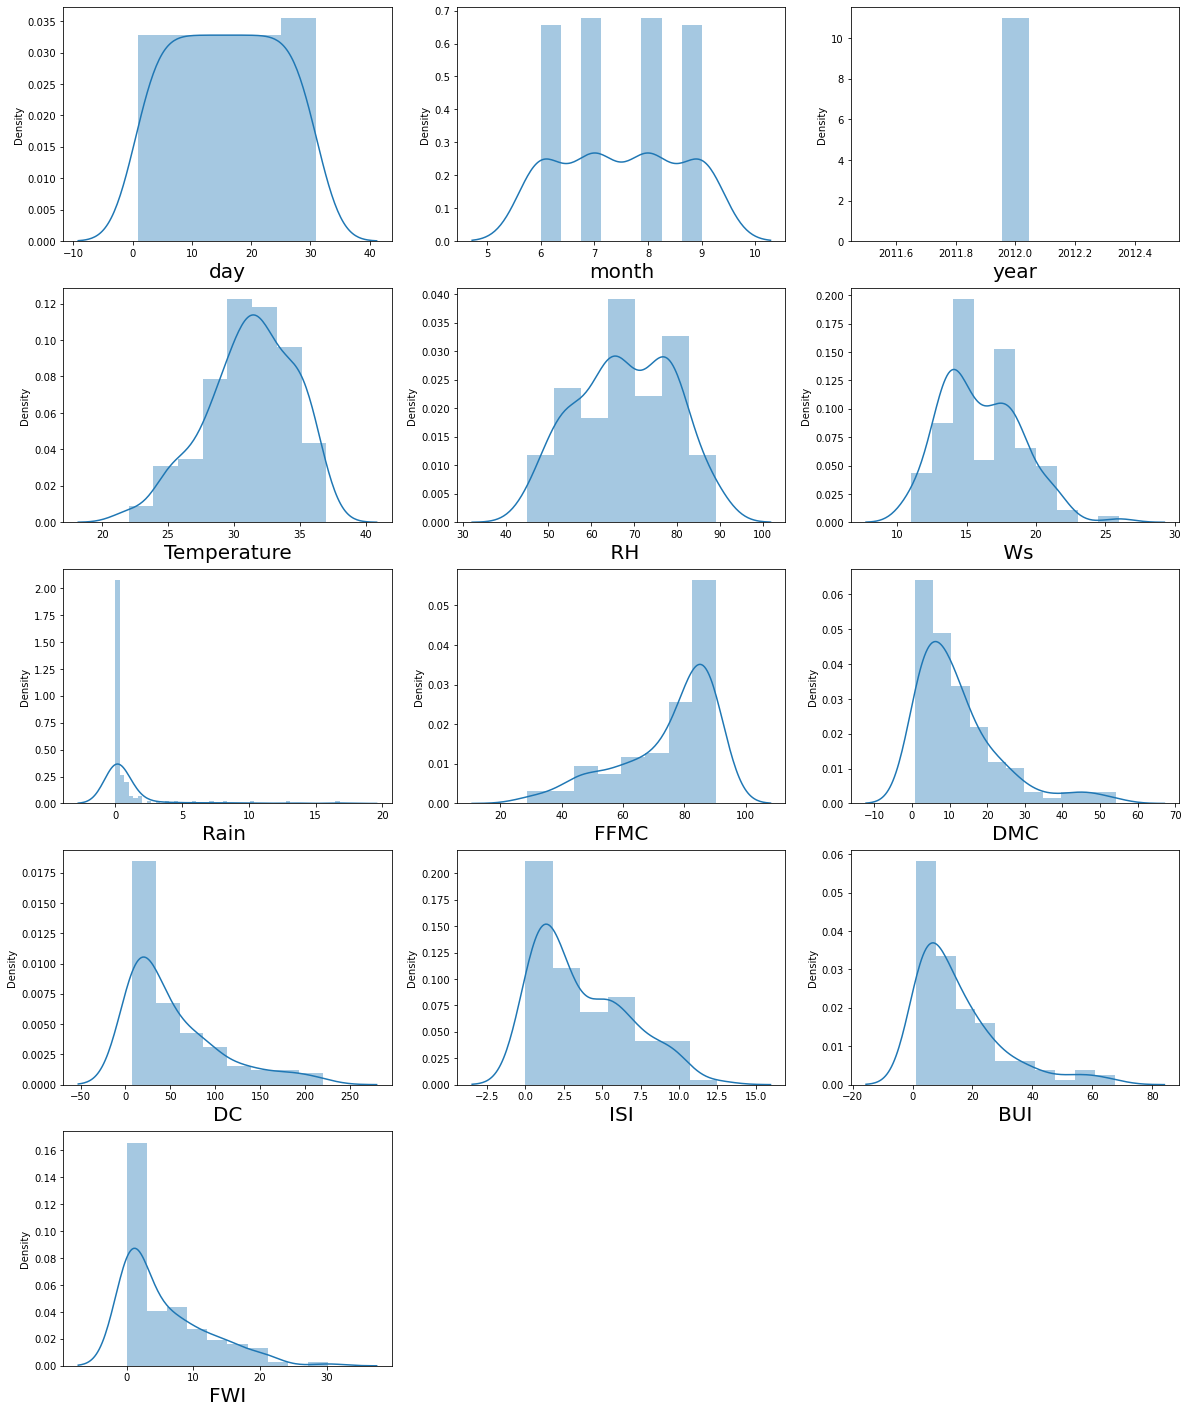

In [36]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1
for column in data:
    if plotnumber<=13:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(br_data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot:>

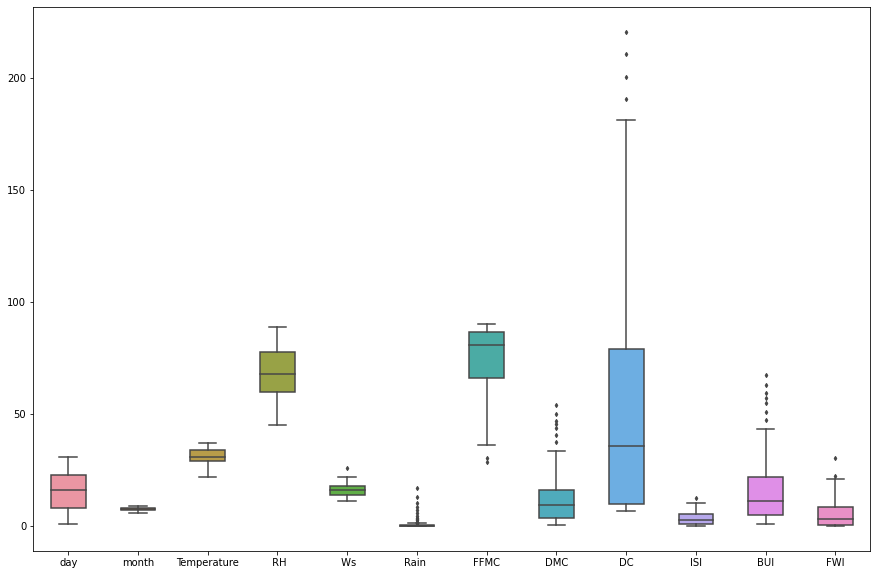

In [42]:
br_data_wo_year = br_data.drop('year',axis = 1)
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=br_data_wo_year,width=0.5,ax=ax,fliersize=3)

In [83]:
q = br_data[' Ws'].quantile(0.99)
data_cleaned = br_data[br_data[' Ws']<q]
q = data_cleaned['Rain '].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['Rain ']<q]
q = data_cleaned['DMC'].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['DMC']<q]
q = data_cleaned['ISI'].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['ISI']<q]
q = data_cleaned['BUI'].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['BUI']<q]
q = data_cleaned['FWI'].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['FWI']<q]
q = data_cleaned['FFMC'].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['FFMC']<q]

<AxesSubplot:>

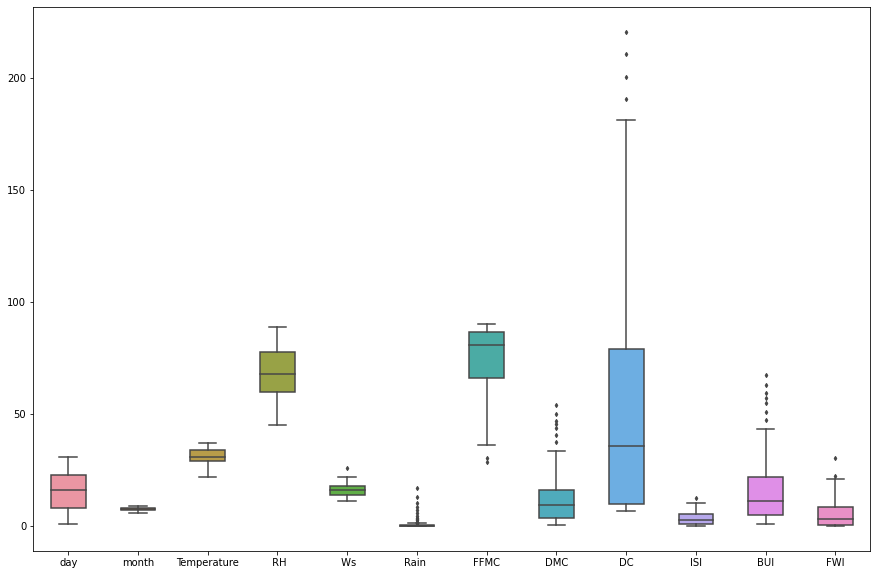

In [84]:
data_clnd_wo_year = data_cleaned.drop('year',axis = 1)
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=br_data_wo_year,width=0.5,ax=ax,fliersize=3)

In [85]:
x_br_clnd = data_cleaned.drop(['Classes  '],axis=1)
y_br_clnd = data_cleaned['Classes  ']

In [86]:
x_br_clnd_train, x_br_clnd_test, y_br_clnd_train, y_br_clnd_test = train_test_split(x_br_clnd,y_br_clnd,test_size=0.33,random_state=42)

In [87]:
from sklearn.preprocessing import StandardScaler
br_clnd_scaler=StandardScaler()

In [88]:
x_br_clnd_train = br_clnd_scaler.fit_transform(x_br_clnd_train)

In [89]:
x_br_clnd_test = br_clnd_scaler.transform(x_br_clnd_test)

In [90]:
br_clnd_regression = LogisticRegression()

In [91]:
br_clnd_regression.fit(x_br_clnd_train,y_br_clnd_train)

LogisticRegression()

In [92]:
br_clnd_reg_pred = br_regression.predict(x_br_clnd_test)

In [94]:
br_clnd_accuracy = accuracy_score(y_br_clnd_test,br_clnd_reg_pred)
print(br_clnd_accuracy)

0.9714285714285714
